<a href="https://colab.research.google.com/github/EmanueleFons/Data-Analysis/blob/main/AnalysisGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset 
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include: 

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

# Problem
The sales department wants to release a new game, but they do not have enough information. Therefore, they need that you guide them in this new project. 

For that, you must start by **answering some questions**:

1. What are the top-selling game genres in the past six years in North America and Global?
2. What platforms are the most popular among gamers in North America and Global?
3. Which publisher has the most successful games in terms of sales?
4. Are there any significant differences in game sales between different publishers?
5. Are there any correlations between the release year and the sales of the game?


In the end, they want **a report containing the answers**.


# Import

In [1]:
#data manipulation
import pandas as pd
import numpy as np
#data visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Exploratory Data Analysis 

In [4]:
df.shape

(16598, 11)

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#describe categorical data
df.describe(include=object)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [8]:
#describe numerical data 
df.describe().drop(columns=['Rank', 'Year'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


*   The first conclusion that we can see is: The mean sales in North America are higher than EU, Japan or others. That can indicate a possible relevance in the trends, since it generates more profit
* The standard deviation show us how the dispersion behave. So, we can conclude that there are probably some outliers in North America Sales and a lot of outliers in Global Sales. Therefore, we can look more closely at these outliers in the next steps.

# Data Cleaning

### Percentage of missing values 

In [9]:
#percentage of missing values
def missing_percentage(df):

    # total cells in dataset
    totalCells = np.product(df.shape)

    # missing values per column
    missingCount = df.isnull().sum()

    # total of missing values
    totalMissing = missingCount.sum()

    # percentage of missing values 
    print("The dataset has", round(((totalMissing/totalCells) * 100), 2), "%", "of missing values.")


In [10]:
missing_percentage(df)

The dataset has 0.18 % of missing values.


In [11]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
# percentage of rows with missing values 
def missing_rows_calc(df):

    #  total of rows with missing values
    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # total of rows
    total_rows = df.shape[0]

    # percentage of missing values 
    print(round(((missing_rows/total_rows) * 100), 2), "%", "the rows in the dataset contain at least one missing value.")

In [13]:
missing_rows_calc(df)

1.85 % the rows in the dataset contain at least one missing value.


* What to do with missing values? 

There are many options for handling missing values, for example: impute values using forward fill, backward fill, or median. However, our percentage of values is very small. So, in this case the best option is to delete the rows with missing values.

In [14]:
# Drop of rows with missing values
def drop_rows_with_missing_values(df):
    old = df.shape[0]
    df.dropna(inplace = True)
    new = df.shape[0]
    count = old - new
    print(f"{count} lines containing missing values were deleted.")


In [15]:
drop_rows_with_missing_values(df)

307 lines containing missing values were deleted.


In [16]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Data Type Transformation 

In [17]:
df['Year'] = df['Year'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Rename Columns

In [19]:
df.rename(columns = {'NA_Sales':'North America', 'EU_Sales':'Europe', 'JP_Sales': 'Japan', 'Other_Sales':'Others', 'Global_Sales': 'Global'}, inplace = True)

In [20]:
list(df)

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'North America',
 'Europe',
 'Japan',
 'Others',
 'Global']

### Drop Column

In [21]:
df.drop('Rank', axis=1)


,Name,Platform,Year,Genre,Publisher,North America,Europe,Japan,Others,Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**The process of data cleaning is a cyclical movement. Then, whenever necessary, this process happens again.**

# Data Visualization 

This is the stage where the data is visualized in order to communicate the findings and insights. This can include creating charts, graphs, maps, and other types of visualizations.

### 1. What are the top-selling game genres in the past six years in North America and Global ? 

In [22]:
# filter the year to get just the range 2010 - 2016 - North America
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
# group the data by genre and find total sales for each genre
genre_sales = df.groupby('Genre').sum()['North America']
# sort the data by total sales in descending order
genre_sales = genre_sales.sort_values(ascending=False)

In [23]:
genre_sales

Genre
Action          287.75
Shooter         227.63
Sports          154.44
Misc            125.26
Role-Playing    107.57
Platform         55.47
Racing           45.62
Fighting         38.95
Simulation       26.42
Adventure        20.64
Strategy         13.25
Puzzle            9.39
Name: North America, dtype: float64

In [24]:
# create a bar chart
fig = go.Figure(data=[go.Bar(x=genre_sales.index, y=genre_sales.values)])

# set the title and axis labels
fig.update_layout(title='Top Selling Game Genres (2010-2016) in North America', xaxis_title='Genre', yaxis_title='Total Sales')

# show the plot
fig.show()

In [25]:
# filter the year to get just the range 2010 - 2016 - Global
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
# group the data by genre and find total sales for each genre
genre_sales_global = df.groupby('Genre').sum()['Global']
# sort the data by total sales in descending order
genre_sales_global = genre_sales_global.sort_values(ascending=False)

In [26]:
genre_sales_global

Genre
Action          673.45
Shooter         462.80
Sports          324.80
Role-Playing    305.67
Misc            238.05
Racing          123.68
Platform        120.67
Fighting         82.08
Simulation       70.86
Adventure        61.03
Strategy         35.74
Puzzle           21.23
Name: Global, dtype: float64

In [27]:
# create a bar chart
fig = go.Figure(data=[go.Bar(x=genre_sales_global.index, y=genre_sales_global.values)])

# set the title and axis labels
fig.update_layout(title='Top Selling Game Genres (2010-2016) Global', xaxis_title='Genre', yaxis_title='Total Sales')

# show the plot
fig.show()

**Insights**


*   The **Action** genre is the best seller during this period.
*   The top 3 games in each one is the same. 
*   The genres Adventure, Strategy , and Puzzle are the **less sold**.
*   The genres Action, Shooter and Sport are the **most sold**.


### 2. What platforms are the most popular among gamers?

In [28]:
# filter the year to get just the range 2010 - 2016 - North America
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
# group the data by platform and find total sales for each platfrom
platform_sales = df.groupby('Platform').sum()['North America']
# sort the data by total sales in descending order
platform_sales = platform_sales.sort_values(ascending=False)

In [29]:
# create a bar chart
fig = go.Figure(data=[go.Bar(x=platform_sales.index, y=platform_sales.values)])

# set the title and axis labels
fig.update_layout(title='Top Platforms (2010-2016) in North America', xaxis_title='Platform', yaxis_title='Total Sales')

# show the plot
fig.show()

In [30]:
#filter the year to get just the range 2010 - 2016 - North America
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
# group the data by platform and find total sales for each platfrom
platform_sales_global = df.groupby('Platform').sum()['Global']
# sort the data by total sales in descending order
platform_sales_global = platform_sales_global.sort_values(ascending=False)

In [31]:
# create a bar chart
fig = go.Figure(data=[go.Bar(x=platform_sales_global.index, y=platform_sales_global.values)])

# set the title and axis labels
fig.update_layout(title='Top Platforms (2010-2016) Global', xaxis_title='Platform', yaxis_title='Total Sales')

# show the plot
fig.show()

 **Insights**


*   Top 3 platform in North America : xbox360, ps3, wii
*   Top 3 platform Global: ps3, xbox360, ps4

### 3. Which publisher has the most successful games in terms of sales?

In [32]:
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
top_10_publishers_sales = df.groupby(['Publisher'])['North America'].sum().nlargest(10)

In [33]:
# create a bar chart
fig = go.Figure(data=[go.Bar(x=top_10_publishers_sales.index, y=top_10_publishers_sales.values)])

# set the title and axis labels
fig.update_layout(title='Top Publishers in North America', xaxis_title='Publisher', yaxis_title='Total Sales')

# show the plot
fig.show()

In [34]:
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)]
top_10_publishers_sales_global = df.groupby(['Publisher'])['Global'].sum().nlargest(10)

In [35]:
fig = go.Figure(data=[go.Bar(x=top_10_publishers_sales_global.index, y=top_10_publishers_sales_global.values)])

# set the title and axis labels
fig.update_layout(title='Top Publishers Global', xaxis_title='Publisher', yaxis_title='Global')

# show the plot
fig.show()

**Insights**

*   In the top 5, we have the same publishers, but the number of sales in both of them is different
*   In North America, we have 2 publishers that are not part of the top 10 global sales and vice versa



### 4 .Are there any significant differences in game sales between different publishers?

In [36]:
top_10_publishers_sales_global_diff = top_10_publishers_sales_global.to_frame()
top_10_publishers_sales_global_diff['diff'] = top_10_publishers_sales_global_diff['Global'].diff()

In [37]:
top_10_publishers_sales_global_diff

,Global,diff
Publisher,,
Electronic Arts,360.92,NaN
Nintendo,301.06,-59.86
Activision,295.65,-5.41
Ubisoft,219.85,-75.80
Take-Two Interactive,176.04,-43.81
Sony Computer Entertainment,124.34,-51.70
Microsoft Game Studios,123.84,-0.50
Warner Bros. Interactive Entertainment,113.98,-9.86
Namco Bandai Games,96.07,-17.91


In [39]:
top_10_publishers_sales_diff =  top_10_publishers_sales.to_frame()
top_10_publishers_sales_diff['diff'] = top_10_publishers_sales_diff['North America'].diff()



*   In global sales, there is a significant difference between the publishers




In [40]:
top_10_publishers_sales_diff

,North America,diff
Publisher,,
Activision,158.25,NaN
Electronic Arts,155.71,-2.54
Nintendo,112.68,-43.03
Ubisoft,105.00,-7.68
Take-Two Interactive,95.28,-9.72
Microsoft Game Studios,77.69,-17.59
Warner Bros. Interactive Entertainment,57.31,-20.38
Sony Computer Entertainment,52.25,-5.06
THQ,33.12,-19.13




*  Unlike global sales, the North American market is more competitive.The difference between the sales is not wide.




### 5. Are there any correlations between the release year and the sales of the game?


**Correlation**->When you have a hypothesis that the increase or decrease of a variable is associated with the evolution of another variable

In [50]:

df.corr()

,Rank,Year,North America,Europe,Japan,Others,Global
Rank,1.000000,0.087976,-0.479161,-0.485475,-0.234012,-0.468800,-0.520506
Year,0.087976,1.000000,-0.049435,0.010654,0.016005,0.000089,-0.017532
North America,-0.479161,-0.049435,1.000000,0.777035,0.247592,0.765295,0.927406
Europe,-0.485475,0.010654,0.777035,1.000000,0.278546,0.950534,0.929272
Japan,-0.234012,0.016005,0.247592,0.278546,1.000000,0.218007,0.437158
Others,-0.468800,0.000089,0.765295,0.950534,0.218007,1.000000,0.900060
Global,-0.520506,-0.017532,0.927406,0.929272,0.437158,0.900060,1.000000


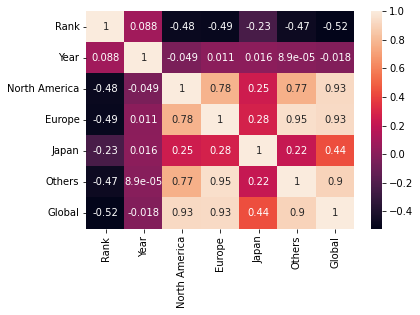

In [51]:
sns.heatmap(df.corr(), annot=True)



*   There's a strong correlation between the sales of North America and Global.  




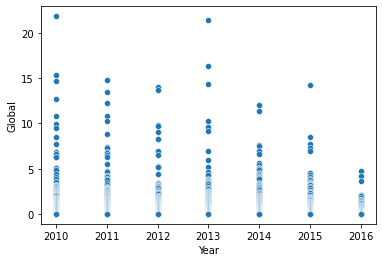

In [69]:
sns.scatterplot(data=df, x='Year', y='Global')

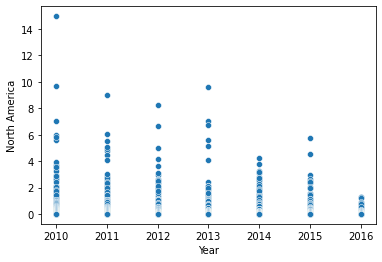

In [53]:
sns.scatterplot(data=df, x='Year', y='North America')

  

*  There's a negative and slight correlation between the variables year  and sales


# Final Report 


## Limitations & Recomendations

**The available data is limited to until the year 2016. To conduct a more 
comprehensive analysis, it would be necessary to gather data from the period between 2017 and 2022.
Thefore, the recomendation is : gather the missing data from the period between 2017 and 2022.**



**In order to further the analysis, it is suggested to conduct an investigation into identifying and analyzing outliers within the data.** 

## Insights

Based on our data exploration, it is recommended to invest in the main genres of Action, Shooter, and Sports as they demonstrate significant profitability. Conversely, genres such as Adventure, Strategy, and Puzzle may not yield as high returns and should be approached with caution. In terms of platform, investing in established and profitable platforms such as Xbox, Playstation, and Wii is recommended. The market is highly competitive, with major players including Activision, Electronic Arts, Nintendo, and Ubisoft. The North American market is more competitive than the global market, the difference between the publishers' profits in the North American market is not large. There is also a strong correlation between the sales in North America and the global market. However, it is important to note that there is a weak and negative correlation between the year variable and the sales variables.